In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import os


In [2]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_data =train.flow_from_directory('basedata/train/', target_size=(200,200),batch_size=3,class_mode='binary')

validation_data =train.flow_from_directory('basedata/validation/', target_size=(200,200),batch_size=3,class_mode='binary')

Found 15 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [7]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 ##
                                 tf.keras.layers.Flatten(),
                                 ##
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 ##
                                 tf.keras.layers.Dense(1,activation='sigmoid')                        
                                 ])

In [8]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [11]:
model_fit=model.fit(train_data,steps_per_epoch=3,epochs=10,validation_data=validation_data)

Epoch 1/10
3/3 [==============================] - 4s 515ms/step - loss: 1.9856 - accuracy: 0.2500 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 277ms/step - loss: 0.7972 - accuracy: 0.5972 - val_loss: 0.6656 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 296ms/step - loss: 0.6954 - accuracy: 0.3056 - val_loss: 0.6330 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 1s 278ms/step - loss: 0.6176 - accuracy: 0.5833 - val_loss: 0.5905 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 338ms/step - loss: 0.6846 - accuracy: 0.7500 - val_loss: 0.5936 - val_accuracy: 0.6667
Epoch 6/10
3/3 [==============================] - 1s 292ms/step - loss: 0.6666 - accuracy: 0.7083 - val_loss: 0.6257 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 1s 283ms/step - loss: 0.6714 - accuracy: 0.4444 - val_loss: 0.3272 - val_accuracy: 1.0000
Epoch 8/10
3/3 [====

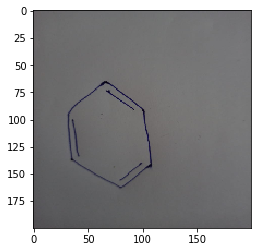

Benzene


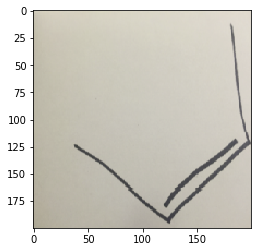

Benzene


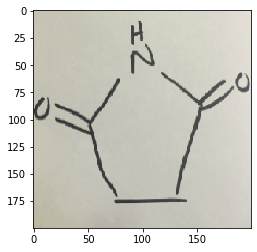

Benzene


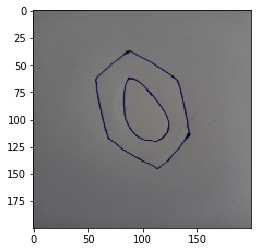

Not benzene


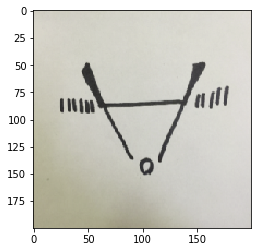

Benzene


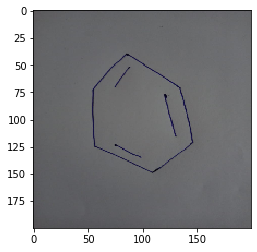

Benzene


In [21]:
path='basedata/testing'
for i in os.listdir(path):
    img = image.load_img(path+'//' +i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    o=model.predict(images)
    if o == 0:
        print("Not benzene")
    else:
        print("Benzene")